In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ford = pd.read_csv('Ford_Stock.csv',index_col='Date', parse_dates=True)
gm = pd.read_csv('GM_Stock.csv',index_col='Date', parse_dates=True)
tesla = pd.read_csv('Tesla_Stock.csv',index_col='Date', parse_dates=True)

In [3]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [4]:
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


In [5]:
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


# Visualization

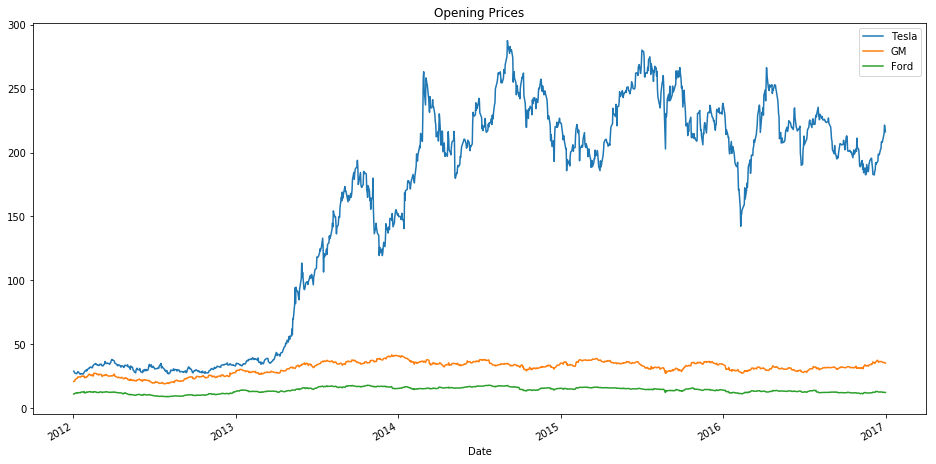

In [6]:
tesla['Open'].plot(label='Tesla', figsize=(16,8), title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

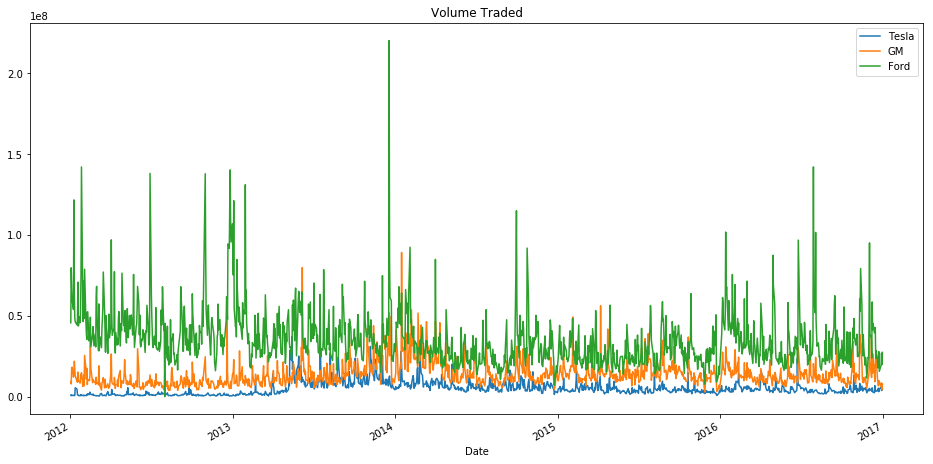

In [7]:
tesla['Volume'].plot(label='Tesla', figsize=(16,8), title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

Huge spike for Ford Volume traded happened due to [this](https://money.cnn.com/2013/12/18/news/companies/ford-profit/index.html)

In [8]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

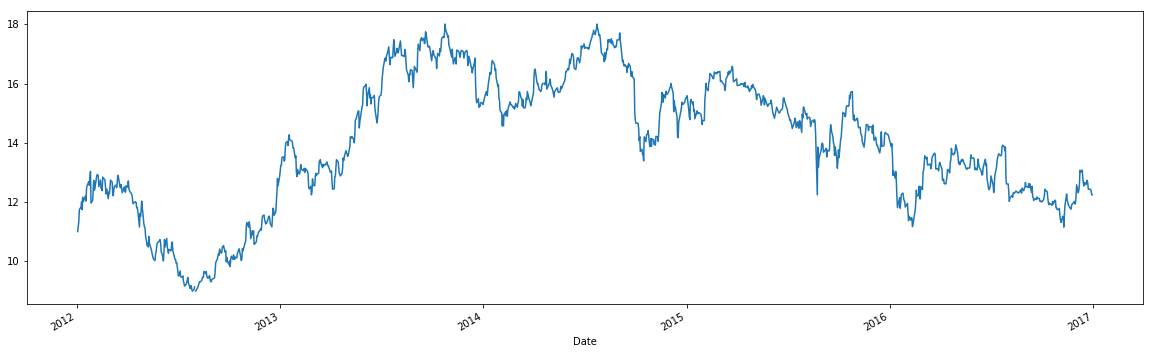

In [9]:
ford['Open'].plot(figsize=(20, 6))

In [10]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']

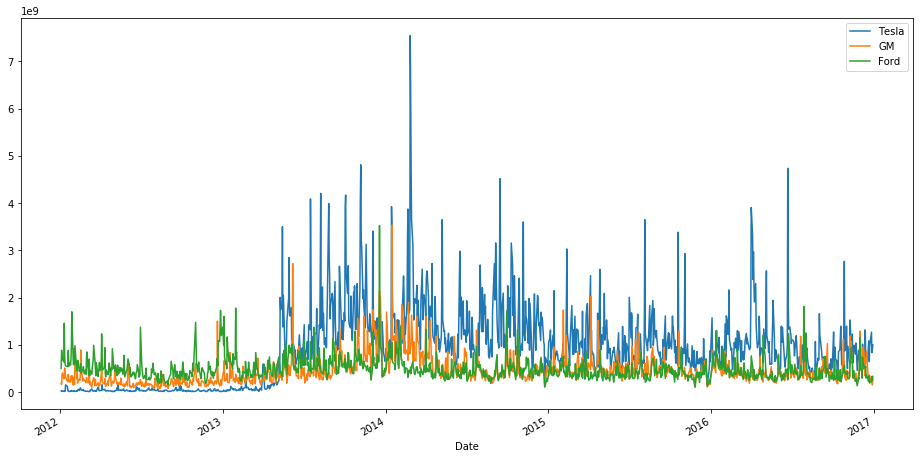

In [11]:
tesla['Total Traded'].plot(label='Tesla', figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend();

Huge spike for Tesla  traded happened due to [this](https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/)

In [12]:
tesla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

# Plotting

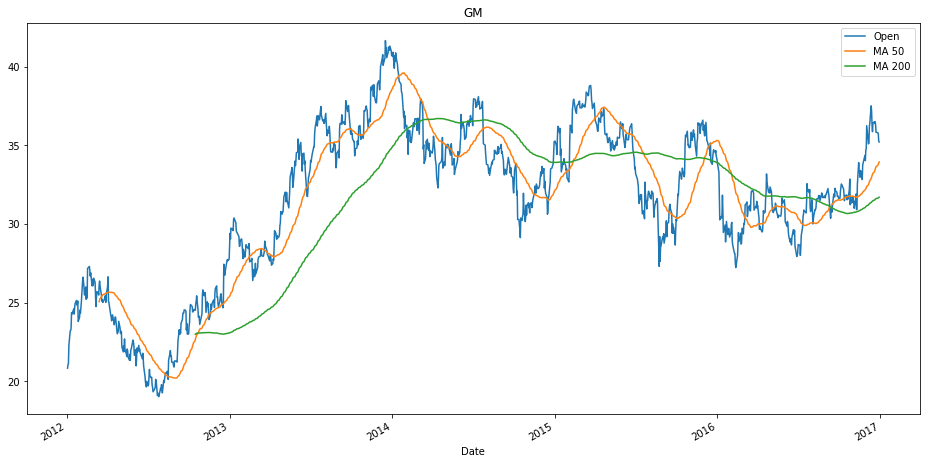

In [13]:
gm['MA 50'] = gm['Open'].rolling(window=50).mean()
gm['MA 200'] = gm['Open'].rolling(window=200).mean()
gm[['Open', 'MA 50', 'MA 200']].plot(figsize=(16,8), title='GM');

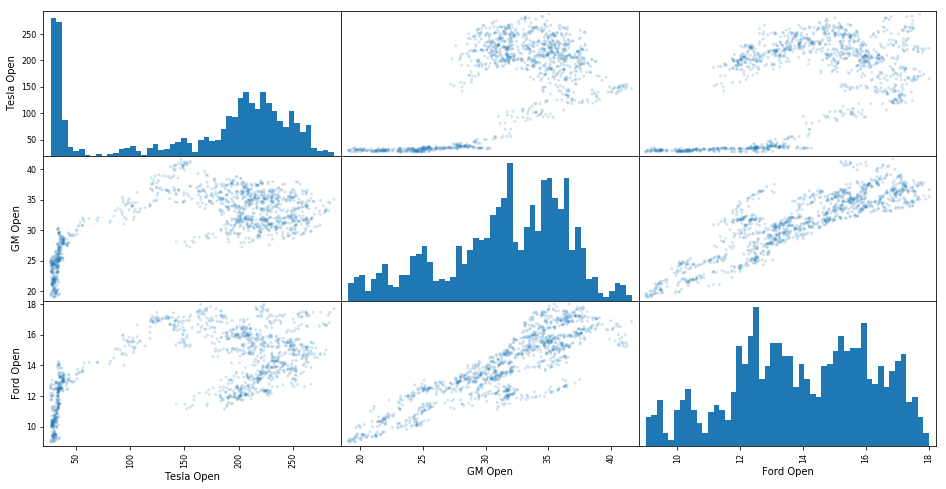

In [14]:
from pandas.plotting import scatter_matrix
car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis=1)
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']
scatter_matrix(car_comp, figsize=(16,8), alpha=0.2, hist_kwds={'bins':50});

# CandleStick chart

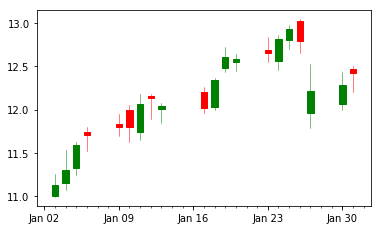

In [27]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator ,MONDAY
ford_reset = ford.loc['2012-01'].reset_index()
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax, ford_values, width=0.6, colorup='g', colordown='r');

# Basic Financial Analysis

## Daily percentage change (https://www.investopedia.com/terms/p/percentage-change.asp)
Informs about percent gain(or loss) if you bought a stock on day and then sold it the next day. If daily returns have a wide distribution, the stock is more volatile from one day to the next.

In [30]:
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1)) - 1 # tesla['returns'] = tesla['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)

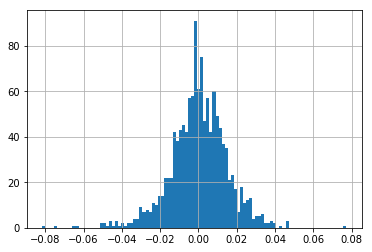

In [34]:
ford['returns'].hist(bins=100);

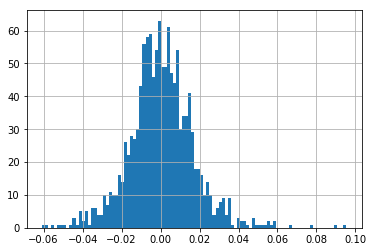

In [35]:
gm['returns'].hist(bins=100);

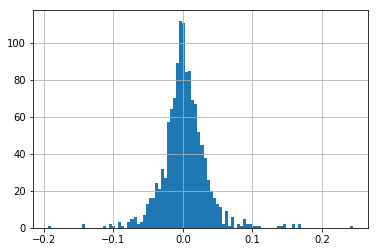

In [36]:
tesla['returns'].hist(bins=100);

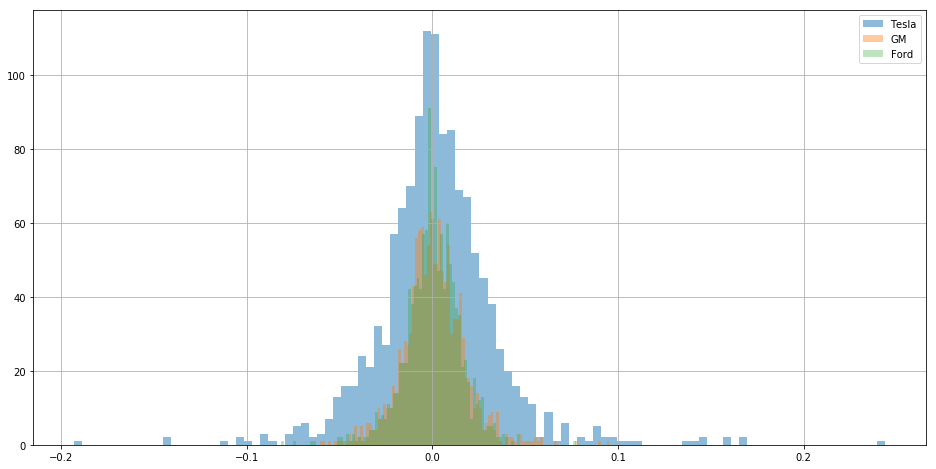

In [40]:
tesla['returns'].hist(bins=100, label='Tesla', figsize=(16,8), alpha=0.5)
gm['returns'].hist(bins=100, label='GM', figsize=(16,8), alpha=0.4)
ford['returns'].hist(bins=100, label='Ford', figsize=(16,8), alpha=0.3)
plt.legend();

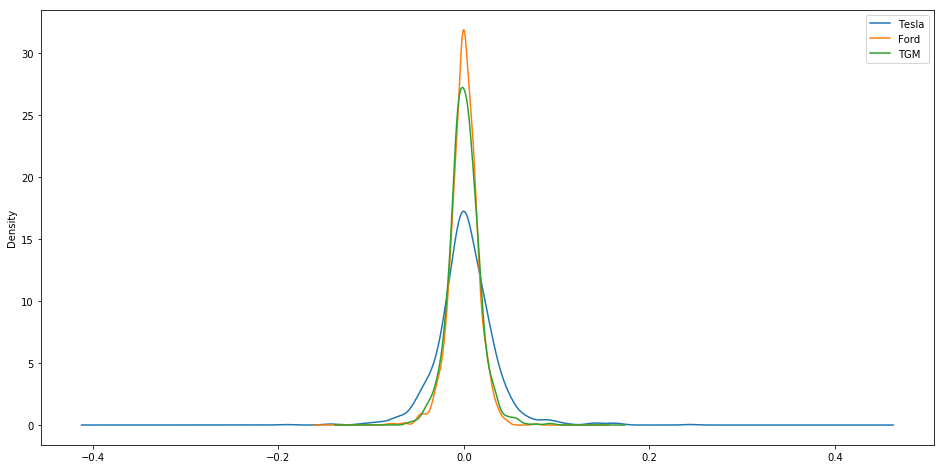

In [42]:
tesla['returns'].plot(kind='kde', label='Tesla', figsize=(16,8))
ford['returns'].plot(kind='kde', label='Ford', figsize=(16,8))
gm['returns'].plot(kind='kde', label='TGM', figsize=(16,8))
plt.legend();

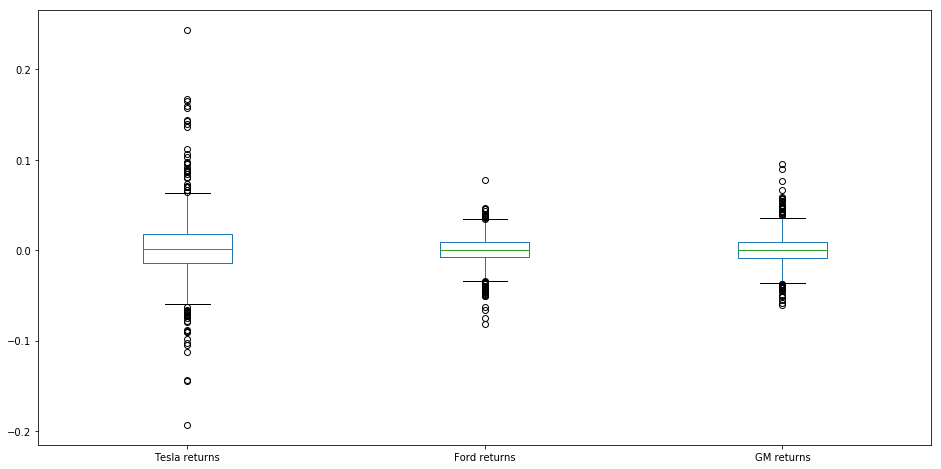

In [48]:
box_df = pd.concat([tesla['returns'], ford['returns'], gm['returns']], axis=1)
box_df.columns= ['Tesla returns', 'Ford returns', 'GM returns']
box_df.plot(kind='box', figsize=(16, 8));

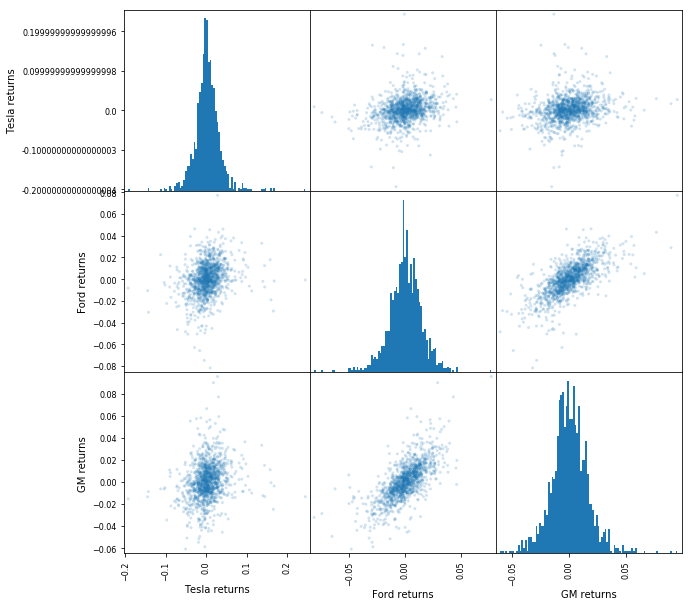

In [49]:
# Comparing daily returns between the stocks
scatter_matrix(box_df, figsize=(10,10), alpha=0.2, hist_kwds={'bins':100});

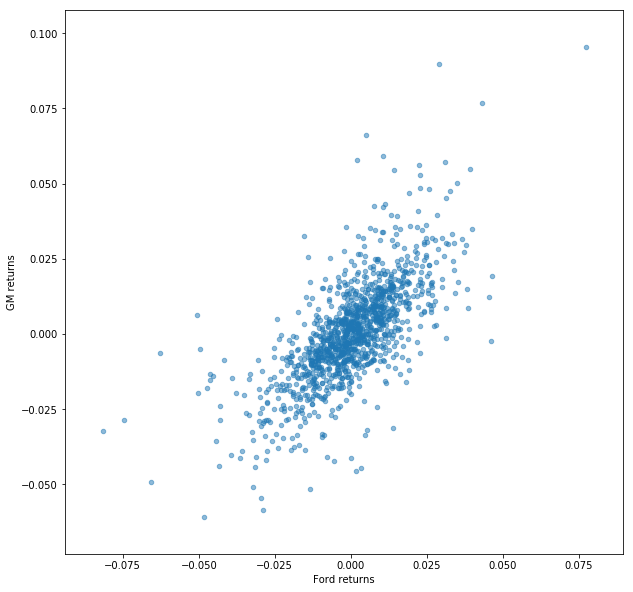

In [51]:
box_df.plot(kind='scatter', x='Ford returns', y='GM returns', alpha=0.5, figsize=(10,10));

## Cumulative daily returns
Aggregate amount an investment has gained or lost over time, independent of the period of time involved

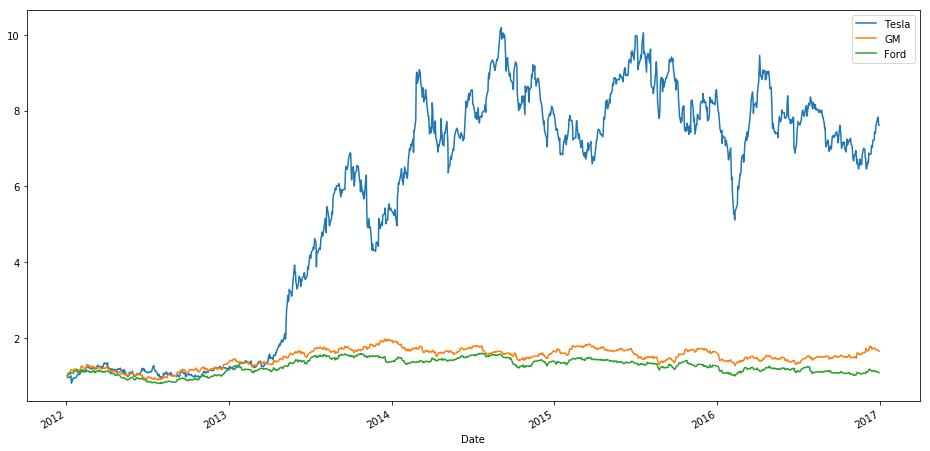

In [56]:
tesla['Cumulative return'] = (1 + tesla['returns']).cumprod()
gm['Cumulative return'] = (1 + gm['returns']).cumprod()
ford['Cumulative return'] = (1 + ford['returns']).cumprod()

tesla['Cumulative return'].plot(label='Tesla', figsize=(16,8))
gm['Cumulative return'].plot(label='GM')
ford['Cumulative return'].plot(label='Ford')
plt.legend();